In [51]:
import json
import os.path as osp
import numpy as np
from matplotlib import pyplot as plt
import pickle as pkl

In [12]:
def get_smpl_params(subject_list, annot_dir):
    smpl_params = {}
    for subject in subject_list:
        with open(osp.join(annot_dir, 'Human36M_subject' + str(subject) + '_smpl_param.json'), 'r') as f:
            smpl_params[str(subject)] = json.load(f)
    return smpl_params

In [25]:
def get_shape_array_h36m(subject, smpl_params):
    shape_subject = []
    for act in sorted(smpl_params[subject].keys()):
        for subact in sorted(smpl_params[subject][act].keys()):
            for frame in sorted(smpl_params[subject][act][subact].keys()):
                shape = np.array(smpl_params[subject][act][subact][frame]['shape'])
                #shape[(np.abs(shape) > 3).any(axis=0)] = 0.
                shape_subject.append(shape)        
    return np.array(shape_subject)

In [49]:
def plot_shapes_h36m(smpl_params, x, y, save_plot=False):
    plt.figure(figsize = (16,9))
    plt.title('shapes of all subjects')
    x_min = y_min = np.Inf
    x_max = y_max = - np.Inf
    for subject in smpl_params.keys():
        shape_subject = get_shape_array_h36m(subject, smpl_params).T[[x,y]].T
        shape_mean = shape_subject.mean(axis=0)
        shape_std = shape_subject.std(axis=0)
        x_min, y_min = np.min([np.array([x_min, y_min]), shape_mean - 2*shape_std], axis=0)
        x_max, y_max = np.max([np.array([x_max, y_max]), shape_mean + 2*shape_std], axis=0)
        plt.plot(shape_subject[:,0], shape_subject[:,1], '.', label=f'subject:{subject}') 
    plt.xlim([int(x_min), int(x_max+1)])
    plt.ylim([int(y_min), int(y_max+1)])
    plt.legend()
    if save_plot:
        plt.savefig("/Users/clara/Desktop/UNI/2021_SS/BA_HMR/Plots_shape/shape_h36m.pdf")
    plt.show()
    

In [19]:
subject_list = [1, 5, 6, 7, 8, 9, 11]
smpl_params = get_smpl_params(subject_list=subject_list, annot_dir='/Users/clara/Desktop/MeineProjekte/H36M/annotations')

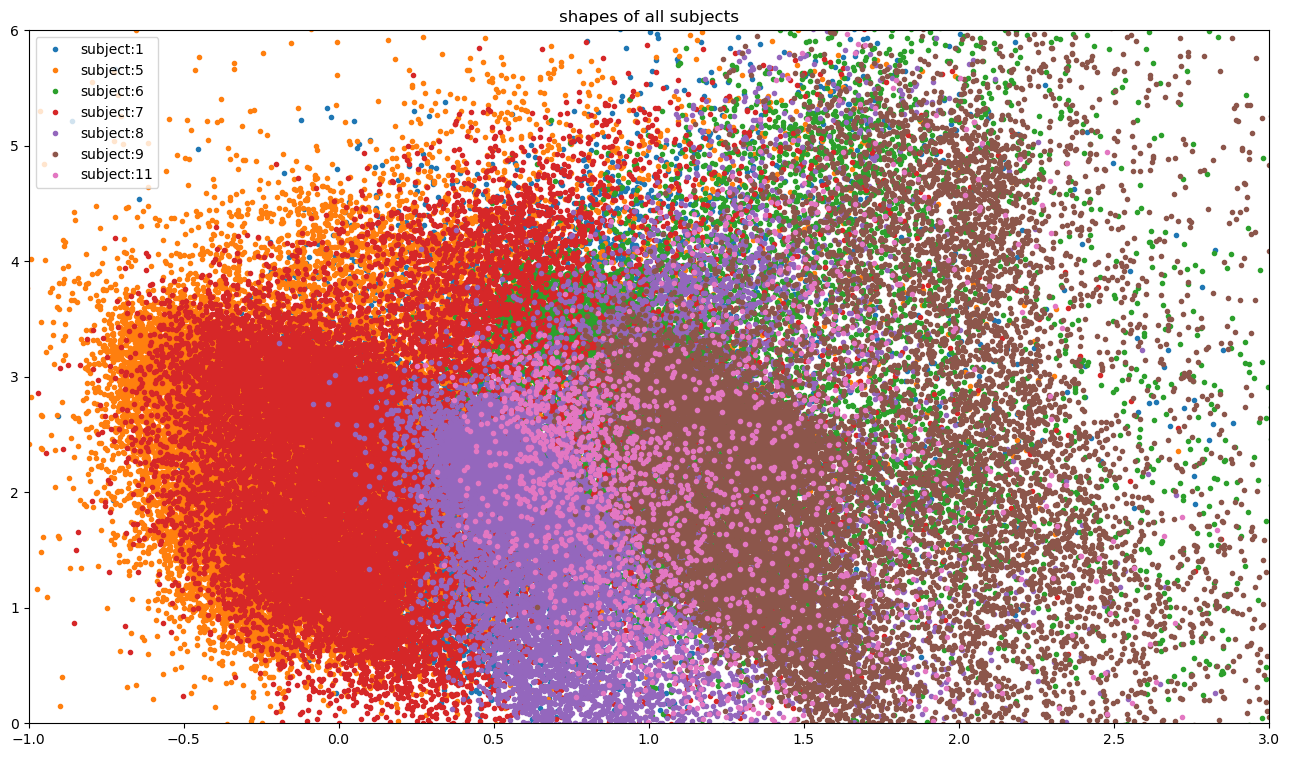

In [50]:
plot_shapes_h36m(smpl_params, 0, 1)
#plot_shapes(smpl_params, 2, 3)
#plot_shapes(smpl_params, 4, 5)

In [ ]:
def plot_shapes_h36m(smpl_params, x, y, save_plot=False):
    plt.figure(figsize = (16,9))
    plt.title('shapes of all subjects')
    x_min = y_min = np.Inf
    x_max = y_max = - np.Inf
    for subject in smpl_params.keys():
        shape_subject = get_shape_array_3dpw(subject, smpl_params).T[[x,y]].T
        shape_mean = shape_subject.mean(axis=0)
        shape_std = shape_subject.std(axis=0)
        x_min, y_min = np.min([np.array([x_min, y_min]), shape_mean - 2*shape_std], axis=0)
        x_max, y_max = np.max([np.array([x_max, y_max]), shape_mean + 2*shape_std], axis=0)
        plt.plot(shape_subject[:,0], shape_subject[:,1], '.', label=f'subject:{subject}') 
    plt.xlim([int(x_min), int(x_max+1)])
    plt.ylim([int(y_min), int(y_max+1)])
    plt.legend()
    if save_plot:
        plt.savefig("/Users/clara/Desktop/UNI/2021_SS/BA_HMR/Plots_shape/shape_h36m.pdf")
    plt.show()